<a href="https://colab.research.google.com/github/tushar4556/DAI-assignment/blob/main/23119051Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


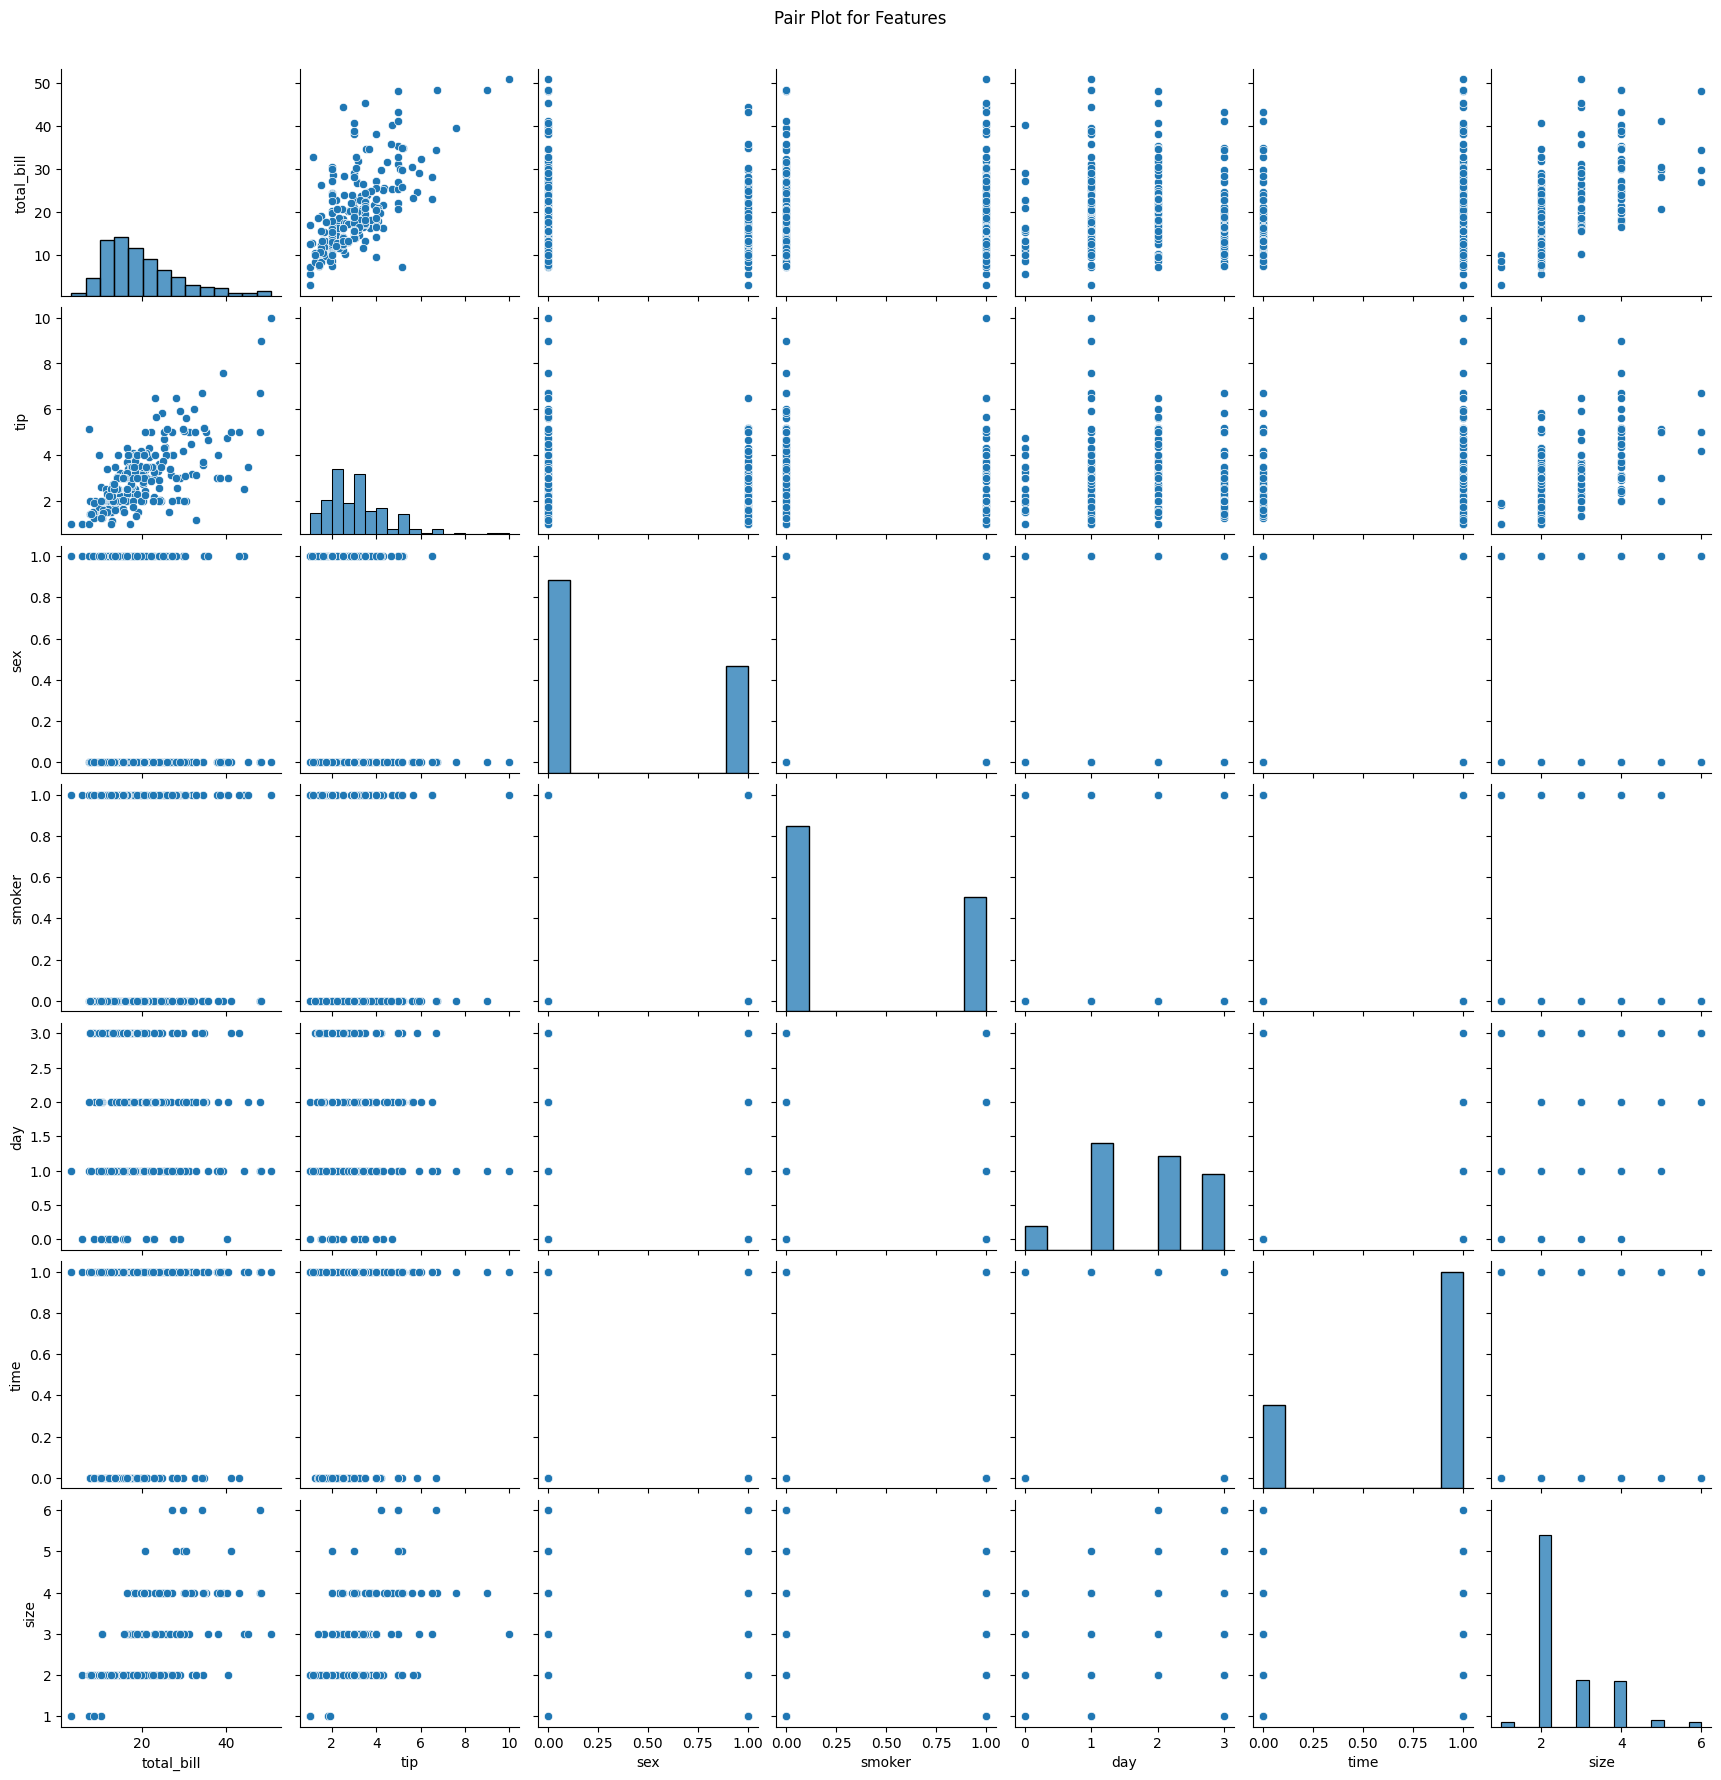

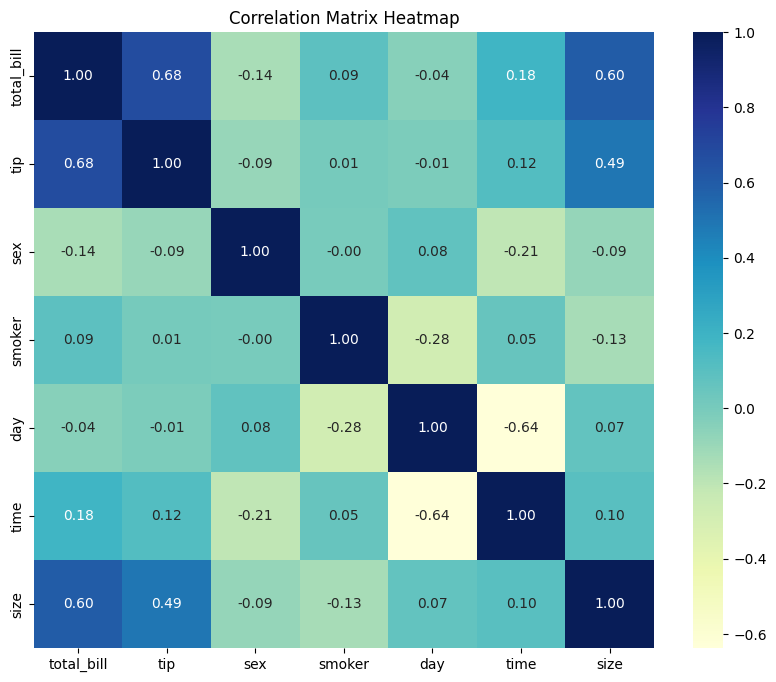

Rainbow Test Statistic: 1.2036, p-value: 0.1580


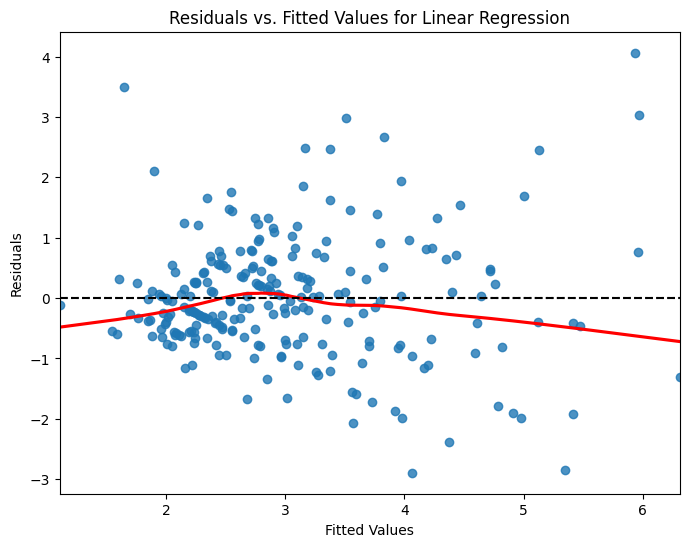

                       Model  R² Score       MAE       MSE
5  Support Vector Regression  0.569327  0.570691  0.538329
2                      Lasso  0.527307  0.637484  0.590853
1                      Ridge  0.445788  0.669679  0.692749
0          Linear Regression  0.444137  0.670381  0.694813
6        K-Nearest Neighbors  0.329403  0.726245  0.838227
4              Random Forest  0.209347  0.781822  0.988293
3              Decision Tree -0.004616  0.843061  1.255741

The model with the highest R² Score is: Support Vector Regression


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

# Load data
df = pd.read_csv("/content/tips (data for regression problem).csv")
print(df.head())

# Data Preprocessing
df['sex'] = df['sex'].apply(lambda x: 0 if x == 'Male' else 1)
df['smoker'] = df['smoker'].apply(lambda x: 1 if x == 'Yes' else 0)
df['day'] = df['day'].astype('category').cat.codes
df['time'] = df['time'].map({'Lunch': 0, 'Dinner': 1})

# Pair plot and heatmap
sns.pairplot(df)
plt.suptitle("Pair Plot for Features", y=1.02)
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

# Linearity Check: Rainbow Test
features = df[['total_bill', 'size', 'sex', 'smoker', 'day', 'time']]
target = df['tip']
features_with_const = sm.add_constant(features)
linear_reg = sm.OLS(target, features_with_const).fit()
rainbow_stat, rainbow_p_val = linear_rainbow(linear_reg)
print(f"Rainbow Test Statistic: {rainbow_stat:.4f}, p-value: {rainbow_p_val:.4f}")

# Residual Plot
plt.figure(figsize=(8, 6))
sns.residplot(x=linear_reg.fittedvalues, y=linear_reg.resid, lowess=True, line_kws={'color': 'red'})
plt.title("Residuals vs. Fitted Values for Linear Regression")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.axhline(0, color='black', linestyle='--')
plt.show()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define and fit models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(kernel='rbf'),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Store evaluation metrics
model_metrics = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    model_metrics.append({
        "Model": model_name,
        "R² Score": r2,
        "MAE": mae,
        "MSE": mse
    })

# Display results
metrics_df = pd.DataFrame(model_metrics).sort_values(by="R² Score", ascending=False)
print(metrics_df)

# Identify the best model based on R² Score
top_model = metrics_df.iloc[0]["Model"]
print(f"\nThe model with the highest R² Score is: {top_model}")